# Examining Data and Correlation Analysis

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from scipy import stats
from scipy.stats import ks_2samp




In [33]:
dataset_path = r'Clean_Data'

In [34]:
types = {
    'destination_port': 'uint32',
    'flow_duration': 'int64',
    'tot_fwd_pkts': 'uint32',
    'tot_bwd_pkts': 'uint32',
    'totlen_fwd_pkts': 'uint32',
    'totlen_bwd_pkts': 'uint32',
    'fwd_pkt_len_max': 'uint16',
    'fwd_pkt_len_min': 'uint16',
    'fwd_pkt_len_mean': 'float32',
    'fwd_pkt_len_std': 'float32',
    'bwd_pkt_len_max': 'uint16',
    'bwd_pkt_len_min': 'uint16',
    'bwd_pkt_len_mean': 'float32',
    'bwd_pkt_len_std': 'float32',
    'flow_byts_s': 'float64',
    'flow_pkts_s': 'float64',
    'flow_iat_mean': 'float32',
    'flow_iat_std': 'float32',
    'flow_iat_max': 'int64',
    'flow_iat_min': 'int64',
    'fwd_iat_tot': 'int64',
    'fwd_iat_mean': 'float32',
    'fwd_iat_std': 'float32',
    'fwd_iat_max': 'int64',
    'fwd_iat_min': 'int64',
    'bwd_iat_tot': 'uint32',
    'bwd_iat_mean': 'float32',
    'bwd_iat_std': 'float32',
    'bwd_iat_max': 'uint32',
    'bwd_iat_min': 'uint32',
    'fwd_psh_flags': 'uint8',
    'bwd_psh_flags': 'uint8',
    'fwd_urg_flags': 'uint8',
    'bwd_urg_flags': 'uint8',
    'fwd_header_len': 'uint32',
    'bwd_header_len': 'uint32',
    'flow_byts_s': 'float32',
    'bwd_pkts_s': 'float32',
    'pkt_len_min': 'uint16',
    'pkt_len_max': 'uint16',
    'pkt_len_mean': 'float32',
    'pkt_len_std': 'float32',
    'pkt_len_var': 'float32',
    'fin_flag_cnt': 'uint8',
    'syn_flag_cnt': 'uint8',
    'rst_flag_cnt': 'uint8',
    'psh_flag_cnt': 'uint8',
    'ack_flag_cnt': 'uint8',
    'urg_flag_cnt': 'uint8',
    'cwe_flag_count': 'uint8',
    'ece_flag_cnt': 'uint8',
    'down_up_ratio': 'uint16',
    'pkt_size_avg': 'float32',
    'fwd_seg_size_avg': 'float32',
    'bwd_seg_size_avg': 'float32',
    'fwd_byts_b_avg': 'uint8',
    'fwd_pkts_b_avg': 'uint8',
    'fwd_blk_rate_avg': 'uint8',
    'bwd_byts_b_avg': 'uint8',
    'bwd_pkts_b_avg': 'uint8',
    'bwd_blk_rate_avg': 'uint8',
    'subflow_fwd_pkts': 'uint32',
    'subflow_fwd_byts': 'uint32',
    'subflow_bwd_pkts': 'uint32',
    'subflow_bwd_byts': 'uint32',
    'init_fwd_win_byts': 'int32',
    'init_bwd_win_byts': 'int32',
    'fwd_act_data_pkts': 'uint32',
    'fwd_seg_size_min': 'uint8',
    'active_mean': 'float32',
    'active_std': 'float32',
    'active_max': 'uint32',
    'active_min': 'uint32',
    'idle_mean': 'float32',
    'idle_std': 'float32',
    'idle_max': 'uint64',
    'idle_min': 'uint64',
    'label': 'category'
}

In [35]:
csv_files = glob.glob(os.path.join(dataset_path, "*.csv"))
df = pd.concat((pd.read_csv(f, dtype=types) for f in csv_files))

In [36]:
inf_columns = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]

print(f'Columns containing infinity values {inf_columns}')

Columns containing infinity values []


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853828 entries, 0 to 223081
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   destination_port             853828 non-null  uint32 
 1   flow_duration                853828 non-null  int64  
 2   total_fwd_packets            853828 non-null  int64  
 3   total_backward_packets       853828 non-null  int64  
 4   total_length_of_fwd_packets  853828 non-null  int64  
 5   total_length_of_bwd_packets  853828 non-null  int64  
 6   fwd_packet_length_max        853828 non-null  int64  
 7   fwd_packet_length_min        853828 non-null  int64  
 8   fwd_packet_length_mean       853828 non-null  float64
 9   fwd_packet_length_std        853828 non-null  float64
 10  bwd_packet_length_max        853828 non-null  int64  
 11  bwd_packet_length_min        853828 non-null  int64  
 12  bwd_packet_length_mean       853828 non-null  float64
 13  bwd_

In [38]:
for col in inf_columns:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)

In [39]:
df['label'] = df.label.astype('category')
df['label_code'] = df['label'].cat.codes
df['label_is_attack'] = df.label.apply(lambda x: 0 if x == 'BENIGN' else 1)

In [40]:
attack_types = [a for a in df.label.value_counts().index.tolist() if a != 'Benign']

for a in attack_types:
    l = 'label_is_attack_' + a.replace('-', ' ').replace(' ', '_').lower()
    df[l] = df.label.apply(lambda x: 1 if x == a else 0)

In [41]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 853828 entries, 0 to 223081
Data columns (total 88 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   destination_port                            853828 non-null  uint32  
 1   flow_duration                               853828 non-null  int64   
 2   total_fwd_packets                           853828 non-null  int64   
 3   total_backward_packets                      853828 non-null  int64   
 4   total_length_of_fwd_packets                 853828 non-null  int64   
 5   total_length_of_bwd_packets                 853828 non-null  int64   
 6   fwd_packet_length_max                       853828 non-null  int64   
 7   fwd_packet_length_min                       853828 non-null  int64   
 8   fwd_packet_length_mean                      853828 non-null  float64 
 9   fwd_packet_length_std                       853828 non-null  flo

<Axes: xlabel='label_is_attack', ylabel='count'>

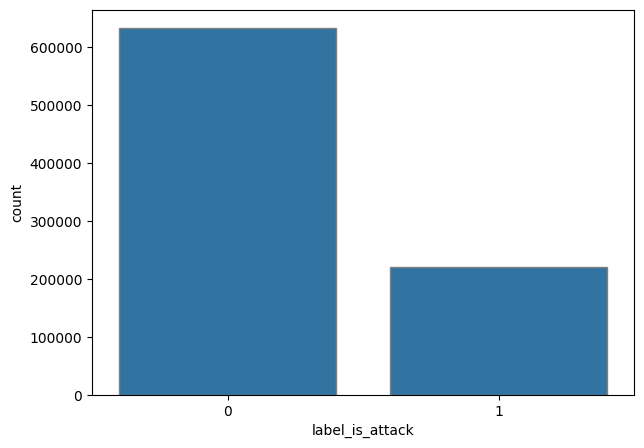

In [42]:

edgecolor = 'grey'
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='label_is_attack', data=df, order = df['label_is_attack'].value_counts().index, ax=ax, edgecolor=edgecolor)

In [43]:


df_is_attack = df.groupby('label_is_attack').agg({'label_is_attack':'first', 'label_is_attack':'count'}).rename_axis(None).sort_values('label_is_attack', ascending=False)
df_is_attack['percentage'] = df_is_attack / df_is_attack.loc[:'label_is_attack'].sum()
df_is_attack



,label_is_attack,percentage
0,632941,0.741298
1,220887,0.258702


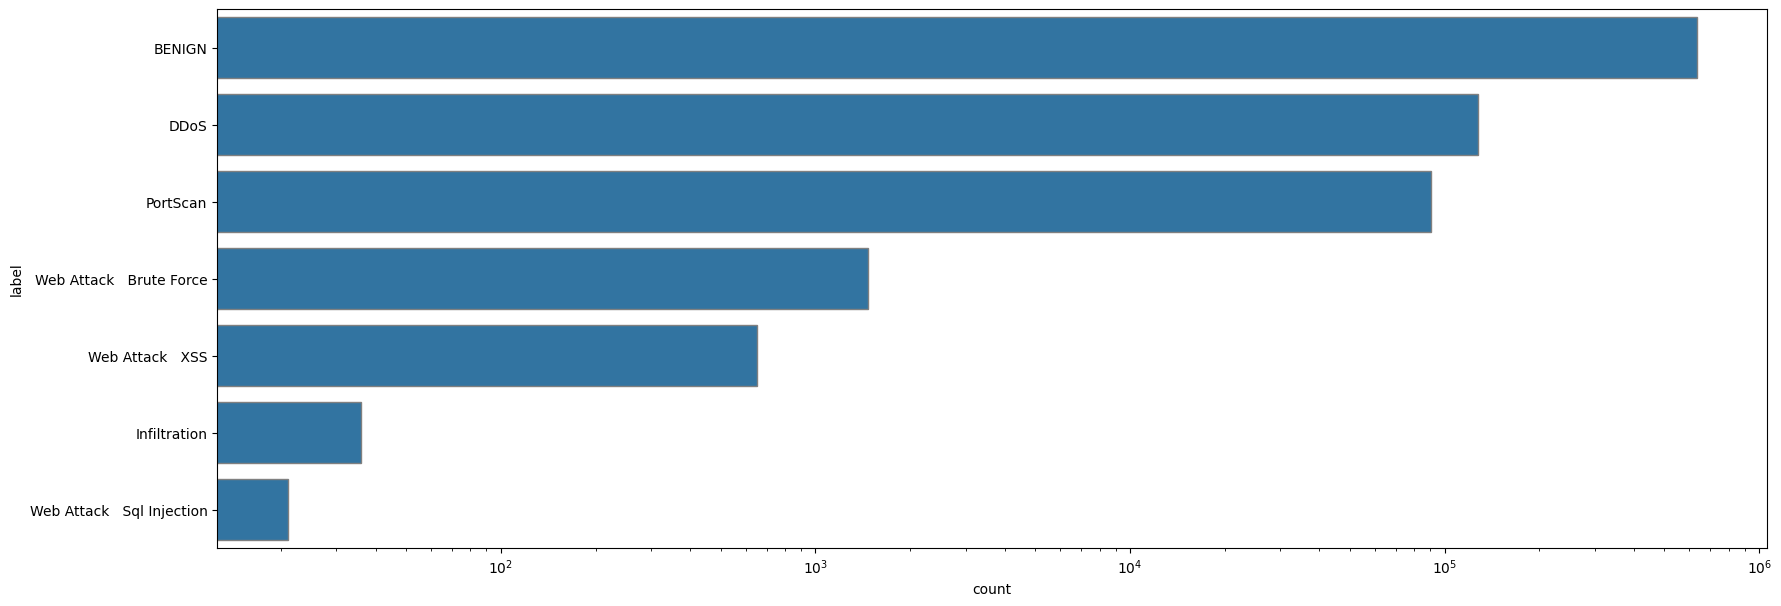

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
f, ax = plt.subplots(figsize=(20, 7))

# Generate the plot
sns.countplot(data=df, y='label', order=df['label'].value_counts().index, edgecolor=edgecolor, ax=ax)

# Set x scale to logarithmic
ax.set_xscale('log')

plt.show()



In [45]:
df.groupby('label').agg({'label':'first', 'label':'count'}).rename_axis(None).sort_values('label', ascending=False)

/var/folders/7j/9czfpkvx5pxc0dgf7s0f36gm0000gn/T/ipykernel_6417/553043559.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('label').agg({'label':'first', 'label':'count'}).rename_axis(None).sort_values('label', ascending=False)


,label
BENIGN,632941
DDoS,128014
PortScan,90694
Web Attack Brute Force,1470
Web Attack XSS,652
Infiltration,36
Web Attack Sql Injection,21


# Feature Correlation

In [47]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder
labelencoder = LabelEncoder()

if 'label' in df.columns:
    # Replace special characters in the label column
    df['label'] = df['label'].str.replace("�", " ")
    
    # Fit and transform labels in the 'label' column
    df['label'] = labelencoder.fit_transform(df['label'])


<Axes: >

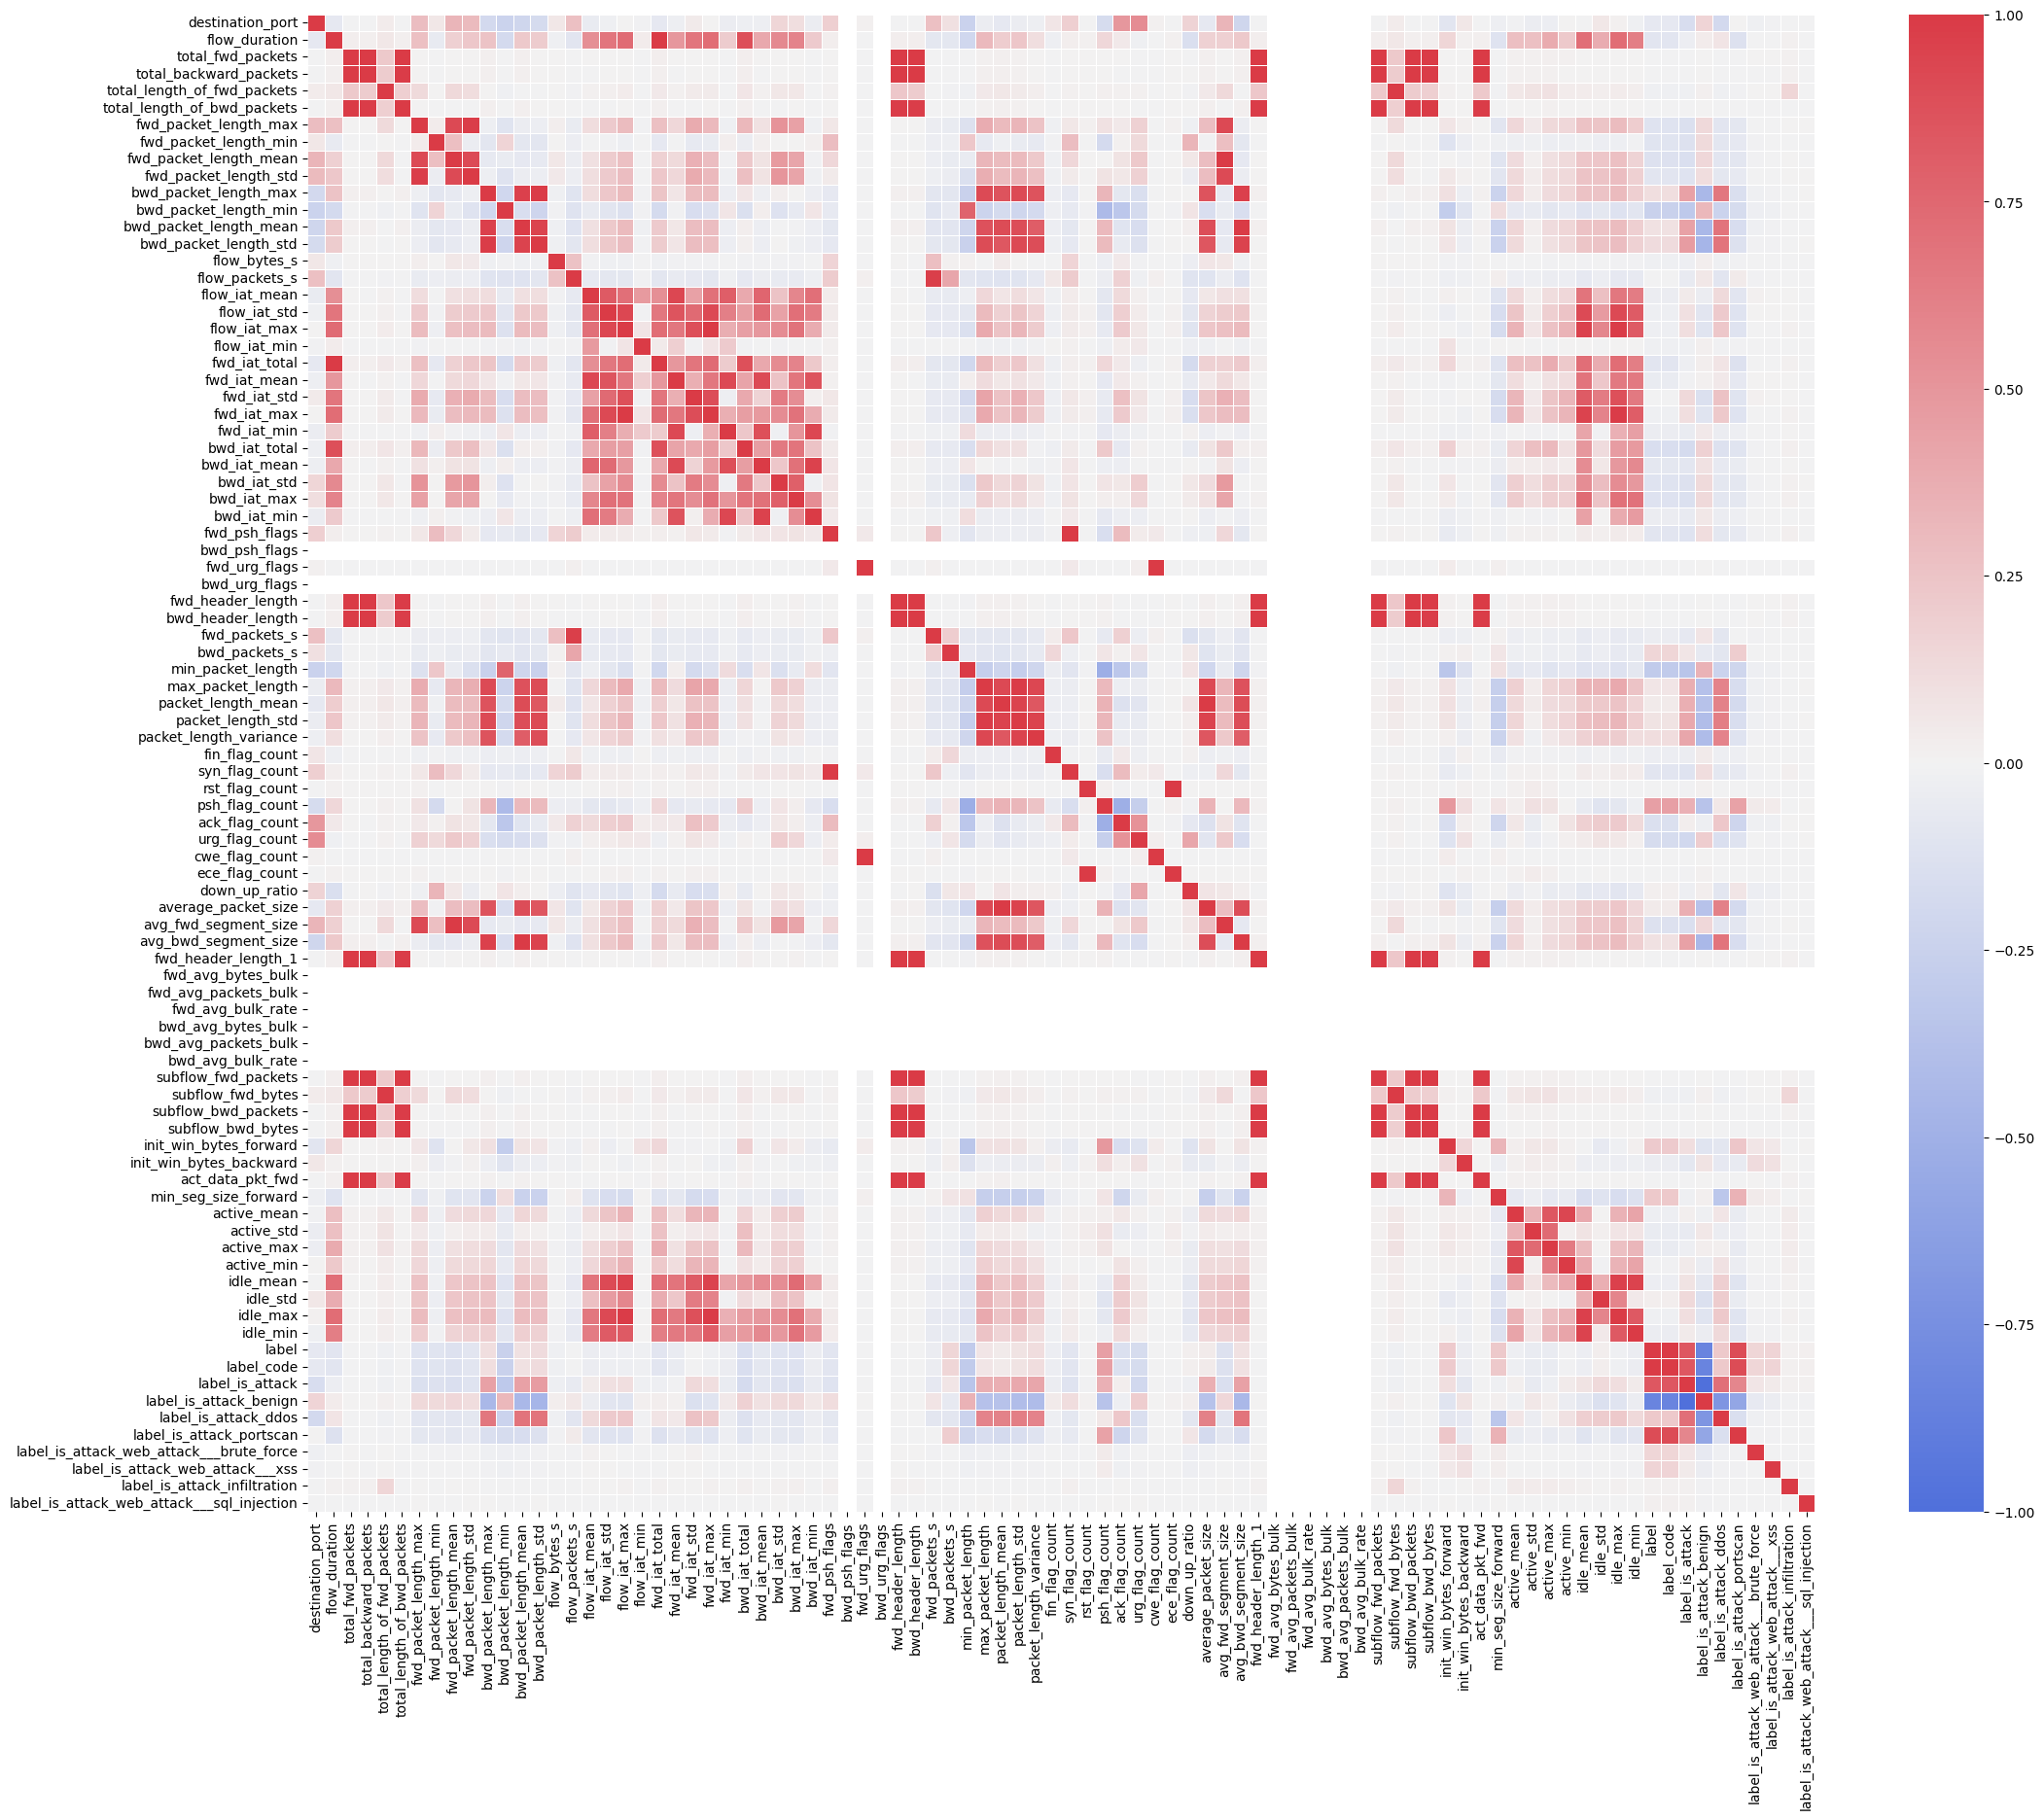

In [48]:
corr = df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True))

In [61]:
def get_abs_correlations(df, t):
    labels_to_drop = set([
       'label', 
       'label_code', 
       'label_is_attack', 
       'label_is_attack_benign', 
       'label_is_attack_ddos',
       'label_is_attack_portscan', 
       'label_is_attack_web_attack___brute_force',
       'label_is_attack_web_attack___xss', 
       'label_is_attack_infiltration',
       'label_is_attack_web_attack___sql_injection'
    ])
    
    # Calculate correlation matrix
    corr = df.corr().abs()

    # Unstack the correlation matrix & drop irrelevant correlations
    c = corr.unstack()
    c = c.drop(labels=labels_to_drop, errors='ignore').sort_values(ascending=False)
    
    return c[c > t]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(get_abs_correlations(df, 0.8))


bwd_packet_length_mean       avg_bwd_segment_size           1.000000
avg_bwd_segment_size         bwd_packet_length_mean         1.000000
destination_port             destination_port               1.000000
active_min                   active_min                     1.000000
flow_duration                flow_duration                  1.000000
fwd_psh_flags                syn_flag_count                 1.000000
flow_iat_mean                flow_iat_mean                  1.000000
total_fwd_packets            subflow_fwd_packets            1.000000
bwd_packet_length_std        bwd_packet_length_std          1.000000
down_up_ratio                down_up_ratio                  1.000000
fwd_iat_min                  fwd_iat_min                    1.000000
subflow_fwd_packets          total_fwd_packets              1.000000
fwd_packet_length_std        fwd_packet_length_std          1.000000
idle_max                     idle_max                       1.000000
packet_length_std            packe

In [75]:


corr_is_attack = corr.label_is_attack.filter(regex=r'^(?!label).*', axis=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(corr_is_attack[corr_is_attack.notnull()].sort_values(ascending=False)[:5])



bwd_packet_length_std     0.462474
bwd_packet_length_max     0.441184
bwd_packet_length_mean    0.441168
avg_bwd_segment_size      0.441168
packet_length_variance    0.407472
Name: label_is_attack, dtype: float64


In [63]:
def remove_outliers(data, col, zscore_thres=3):
    return data[(np.abs(stats.zscore(data[[col]])) < zscore_thres).all(axis=1)]


def plot(fn, height, data, label, col, scale='', with_outliers=True, xlim=[], bins=10):
    fig, ax = plt.subplots(figsize=(18, height))

    d = data if with_outliers else remove_outliers(data, col)
    
    if xlim:
        ax.set_xlim(xlim)
    
    if scale:
        ax.set(xscale=scale)
    
    fn(d, label, col, ax, bins)
    plt.show()

    
def plot_box(data, label, col, scale='', with_outliers=True, xlim=[]):
    plot(lambda d, l, c, ax, b: sns.boxplot(y=l, x=c, data=d, ax=ax, orient='h', width=0.4), 2, data, label, col, scale, with_outliers, xlim)
    
    
def plot_distribution(data, label, col, scale='', with_outliers=True, xlim=[], bins=10):
    plot(lambda d, l, c, ax, b: d.groupby(l)[c].plot.hist(density=True, ax=ax, alpha=0.5, bins=b), 5, data, label, col, scale, with_outliers, xlim, bins)
    
    
def plot_stats(data, label, col, no_outliers=False):
    print(data.groupby(label)[col].describe())
    plot_box(data, label, col)
    
    
def calculate_distribution_similarity(data, label, col):
    '''
    Compare distributions by calculating the p-value for the null hypothesis that data for both categories originates from the same distribution
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
    '''
    a = data[data[label] == 0][col]
    b = data[data[label] == 1][col]
    return ks_2samp(a, b)

                    count        mean          std  min  25%   50%     75%  \
label_is_attack                                                              
0                632941.0  153.432495   279.513156  0.0  6.0  69.3   142.0   
1                220887.0  862.102950  1147.459748  0.0  6.0   6.0  1934.5   

                         max  
label_is_attack               
0                3494.917198  
1                5800.500000  


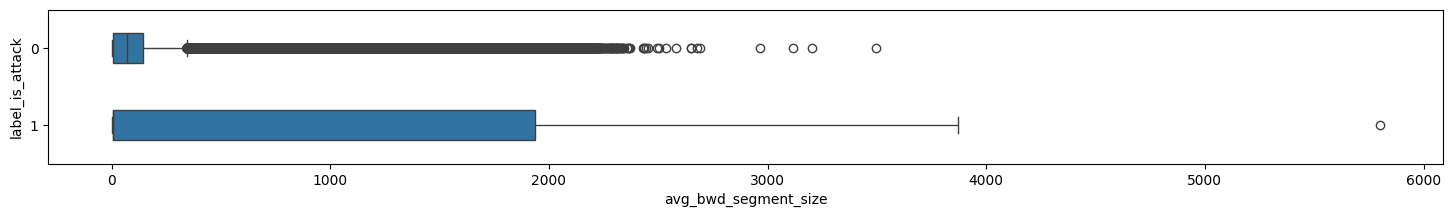

In [80]:
plot_stats(df, 'label_is_attack', 'avg_bwd_segment_size')

In [69]:
df['label_is_attack'].value_counts()
df['label_is_attack'].unique()

array([0, 1])

In [82]:
def remove_highly_correlated(df, threshold):
    # Absolute correlation matrix
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    
    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    
    # Drop the columns 
    df_dropped = df.drop(to_drop, axis=1)
    
    return df_dropped

# Use the function
df_cleaned = remove_highly_correlated(df, 0.8)

print(df_cleaned.head())


   destination_port  flow_duration  total_fwd_packets  \
0                22        1266342                 41   
1                22        1319353                 41   
2                22            160                  1   
3                22        1303488                 41   
4             35396             77                  1   

   total_length_of_fwd_packets  fwd_packet_length_max  fwd_packet_length_min  \
0                         2664                    456                      0   
1                         2664                    456                      0   
2                            0                      0                      0   
3                         2728                    456                      0   
4                            0                      0                      0   

   bwd_packet_length_max  bwd_packet_length_min  flow_bytes_s  flow_packets_s  \
0                    976                      0   7595.104640       67.122468   
1             

In [83]:
df_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 853828 entries, 0 to 223081
Data columns (total 44 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   destination_port                            853828 non-null  uint32 
 1   flow_duration                               853828 non-null  int64  
 2   total_fwd_packets                           853828 non-null  int64  
 3   total_length_of_fwd_packets                 853828 non-null  int64  
 4   fwd_packet_length_max                       853828 non-null  int64  
 5   fwd_packet_length_min                       853828 non-null  int64  
 6   bwd_packet_length_max                       853828 non-null  int64  
 7   bwd_packet_length_min                       853828 non-null  int64  
 8   flow_bytes_s                                853828 non-null  float64
 9   flow_packets_s                              853828 non-null  float64
 10  f

In [84]:
df_cleaned

,destination_port,flow_duration,total_fwd_packets,total_length_of_fwd_packets,fwd_packet_length_max,fwd_packet_length_min,bwd_packet_length_max,bwd_packet_length_min,flow_bytes_s,flow_packets_s,...,min_seg_size_forward,active_mean,active_std,idle_std,label,label_is_attack_ddos,label_is_attack_web_attack___brute_force,label_is_attack_web_attack___xss,label_is_attack_infiltration,label_is_attack_web_attack___sql_injection
0,22,1266342,41,2664,456,0,976,0,7595.104640,67.122468,...,32,0.0,0.0,0.0,0,0,0,0,0,0
1,22,1319353,41,2664,456,0,976,0,7289.936810,64.425518,...,32,0.0,0.0,0.0,0,0,0,0,0,0
2,22,160,1,0,0,0,0,0,0.000000,12500.000000,...,32,0.0,0.0,0.0,0,0,0,0,0,0
3,22,1303488,41,2728,456,0,976,0,7182.267884,63.675308,...,32,0.0,0.0,0.0,0,0,0,0,0,0
4,35396,77,1,0,0,0,0,0,0.000000,38961.038960,...,32,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223077,61374,61,1,6,6,6,6,6,196721.311500,32786.885250,...,20,0.0,0.0,0.0,0,0,0,0,0,0
223078,61378,72,1,6,6,6,6,6,166666.666700,27777.777780,...,20,0.0,0.0,0.0,0,0,0,0,0,0
223079,61375,75,1,6,6,6,6,6,160000.000000,26666.666670,...,20,0.0,0.0,0.0,0,0,0,0,0,0
223080,61323,48,2,12,6,6,0,0,250000.000000,41666.666670,...,20,0.0,0.0,0.0,0,0,0,0,0,0
